**Name**: Wilma Alemios

**SN**: 201908229

**Class**: THQ2

**Task**: Create a noise simulator based on the binary symmetric channel (BSC).

Have fun doing this exercise! 💓

---

# Noisy Images

For this part, we will simulate a binary symmetric channel BSC using images. This exercise follows the discussion about Noisy Images in our Wiki page. All you have to do is create a simulator for this. The goal of this exercise is just to give you a feel of how noise affects our data and how can we correlate it with our theory of information.

The objectives are:
* Task 1 - Create a function that extracts the probability of the binary data. 
* Task 2 - Adding noise to images.
* Task 3 - Creating functions for information measures.
* Task 4 - Answer the following questions.

You will be provided with images from our Git dump. They're simple binary images anyway. We pre-processed these images already.

# RUN ME BUT DON'T CHANGE ANYTHING

You are allowed to study any of the provided functions. You're not allowed to add more than the given imported packages.

In [ ]:
###############################################
# PLEASE DO NOT CHANGE ANYTHING IN THIS CODE BLOCK!
###############################################

###############################################
# Import useful packages for convenience
###############################################
from matplotlib import image
import math                       # For useful math functions like log of 2
import matplotlib.pyplot as plt   # For plotting later
import requests                   # For extracting data saved on git 
import random                     # Might be useful for randomization

###############################################
# We made these for you! Use it wisely :)
###############################################

###############################################
# Calculating information. The input small x is some probability value.
# 0 <= x <= 1
# If you go beyond the input range, it will report the errors
###############################################
def info(x):
    if(x == 0):
        return 0
    if(x == 1):
        return 0
    elif(x < 0):
        print("Error! Can't have negative probabilities")
        return 
    elif(x > 1):
        print("Error! Can't have probabilities more than 1")
    else:
        return -1*(math.log(x,2))

###############################################
# Such an inefficient way of converting binary text
# into a list. Sorry this is just us being lazy. But you
# get the idea :P
###############################################
def convert_to_list(raw_img):
  converted_list = []
  temp_row = []
  for i in raw_img:
    if(i != '\n'):
      if(i == '0'):
        temp_row.append(0)
      else:
        temp_row.append(1)
    else:
      converted_list.append(temp_row)
      temp_row = []

  return converted_list

###############################################
# Displaying listed data as images
###############################################
def display_img(img_data):
  plt.imshow(img_data, cmap='Greys',  interpolation='nearest')
  plt.axis('off')
  return

###############################################
# Clean vs noise score
###############################################
def clean_v_noise(clean_data,noisy_data,noise_prob):

  # Sanity checker
  if(noise_prob < 0 or noise_prob > 1):
    print("Error! Noise probability isn't correct")
    return

  # Get total length per row (either noisy or clean works)
  row_length = len(clean_data)
  col_length = len(clean_data[0])
  total_pix = row_length  * col_length
  noise_count = round(total_pix * noise_prob)

  score = 0

  for i in range(row_length):
    for j in range(col_length):
      if(clean_data[i][j]!=noisy_data[i][j]):
        score += 1
  
  if(score == noise_count):
    print("Great! you got the function perfectly")
  elif(score > noise_count-5 and score < noise_count + 5):
    print("Good! It ain't perfect but that's fine. No deductions for this part")
  else:
    print("ERROR! Your noise simulator isn't OK. Try again.")
  
  return

###############################################
# Theoretical received probability
# just the theoretical computation, should be
# consistent with the actual results
# src_prob1 is the probability of sending a 1 from the source (p)
# noise_prob is our chosen error probability
###############################################
def theo_rcv_prob(src_prob1, noise_prob):
  rcv_prob1 = src_prob1 + noise_prob - 2*src_prob1*noise_prob
  rcv_prob0 = 1 - rcv_prob1

  return [rcv_prob1, rcv_prob0]

###############################################
# Importing data
###############################################
clean_batman_img     = convert_to_list(list(requests.get('https://raw.githubusercontent.com/rgantonio/CoE161---FileDump/main/batman_binary.txt'    ).text))
clean_incredible_img = convert_to_list(list(requests.get('https://raw.githubusercontent.com/rgantonio/CoE161---FileDump/main/incredible_binary.txt').text))
clean_jojo_img       = convert_to_list(list(requests.get('https://raw.githubusercontent.com/rgantonio/CoE161---FileDump/main/jojo_binary.txt'      ).text))

Let's view some images in here 👀. We recommend that you choose ONE image only. Please set choose_image_name to True if you want to use it. You can select all if you like. We gave this option so that you can avoid cluttering the results. You can always go back to this later on! 

In [ ]:
###############################################
# Set your chosen image(s) here
###############################################
choose_batman = False
choose_incredible = False
choose_jojo = True

In [ ]:
###############################################
# Displaying Batman image
###############################################
if(choose_batman):
  display_img(clean_batman_img)

In [ ]:
###############################################
# Displaying sad Mr. Incredible image
###############################################
if(choose_incredible):
  display_img(clean_incredible_img)

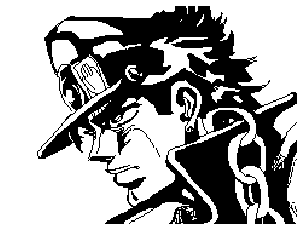

In [ ]:
###############################################
# Displaying Jojo action star
###############################################
if(choose_jojo):
  display_img(clean_jojo_img)

Among these given images, **choose just ONE**. Or you can play around with all images later for fun after working on this exercise 😀

# Task 1 - Extract Binary Probabilities

The image that you chose will be our source message. Your first task is to create the function ``bin_prob(data)`` which gets the binary source data and computes the probability distribution of 1s and 0s from the images. The return value should be a list that contains only two values ``[probability of 1, probability of 0]``. Note, you only have 0.001 margin of error.



In [ ]:
###############################################
# SANDBOX for your testing
###############################################
















###############################################

In [ ]:
###############################################
# Extracting probability for a binary data
###############################################
def bin_prob(data):
  ones_count = 0;
  zeros_count = 0;
  for arr in data:
    for bit in arr:
      if(bit):
        ones_count +=1
      else:
        zeros_count +=1
  total_freq = ones_count+zeros_count

  ones_prob = ones_count/total_freq
  zeros_prob = zeros_count/total_freq
  #print(total_freq)
  return [ones_prob,zeros_prob]
  # Fill your code in here

bin_prob(clean_batman_img)

[0.5309259259259259, 0.4690740740740741]

# CHECKPOINT (1 PT.)

Here's a bit of sanity checking for your work. (1 pt.)

In [ ]:
###############################################
# Sanity checking Batman! DO NOT TOUCH ANYTHING IN HERE
###############################################

if(choose_batman):
  batman_source_prob = bin_prob(clean_batman_img)
  if((batman_source_prob[0] >= 0.53 and batman_source_prob[0] <= 0.531) and (batman_source_prob[1] >= 0.469 and batman_source_prob[1] <= 0.470)):
    print("Batman check is good!")
  else:
    print("Batman check is bad :(")

if(choose_incredible):
  incredible_source_prob = bin_prob(clean_incredible_img)
  if((incredible_source_prob[0] >= 0.554 and incredible_source_prob[0] <= 0.555) and (incredible_source_prob[1] >= 0.445 and incredible_source_prob[1] <= 0.446)):
    print("Incredible check is good!")
  else:
    print("Incredible check is bad :(")

if(choose_jojo):
  jojo_source_prob = bin_prob(clean_jojo_img)
  if((jojo_source_prob[0] >= 0.397 and jojo_source_prob[0] <= 0.398) and (jojo_source_prob[1] >= 0.602 and jojo_source_prob[1] <= 0.603)):
    print("Jojo check is good!")
  else:
    print("Jojo check is bad :(")

Jojo check is good!


# Task 2 - Adding Noise to Images
Great! Now let's simulate noise into our data. Recall from the discussion that the source message is clean. Assuming it goes through some BSC with a noise probability of $\epsilon$, then it will flip some of the bits by that probability.

Create the function `add_noise(data,noise_prob)`. This function takes in the clean `data` (e.g., clean_batman_img), and takes in `noise_prob` which is the noise probability whose value is just from $0 \leq \epsilon \leq 1$. **The output is a new list of the flipped bits**. A few things to consider. 


*   Make sure that the noise is RANDOM. Everytime you call the function, the noise flips bits in random.
*   Doing the randomization method is entirely up to you. You just need to make sure that the percentage of noise is consistent. For example, our images have $240 \times 180$ dimensions $= 43,200$ pixels. If $\epsilon = 0.1$ then that means $4,320$ pixels need to be flipped. We have a checker for this 😉
* What if the noise probability doesn't give a whole number? Apply the `round()` function.
* **Bonus**: Not a requirement but more of added knowledge for you guys. There's a method called **random-indexing** that you might want to research on. However, directly "googling" it might not be helpful 😛



In [ ]:
###############################################
# SANDBOX for your testing
###############################################

###############################################

In [ ]:
###############################################
# Adding noise to the system
###############################################

def add_noise(data,noise_prob):
  data_copy = data.copy()
  newList = []
  
  how_many_flips = 0

  row_length = len(data)
  col_length = len(data[0])
  total_pix = row_length  * col_length
  noise_count = round(total_pix * noise_prob)

  for i in range(len(data)):
    newList.append([])
    for j in range(len(data[0])):
      if ((random.random() < noise_prob) and (how_many_flips != noise_count)):
        if (data[i][j] == 1): 
          newList[i].append(0)
          how_many_flips +=1
        else: 
          newList[i].append(1)
          how_many_flips +=1
      else:
        newList[i].append(data[i][j])

  return newList


# CHECKPOINT (4 PTS.)

Let's run your `add_noise` function and display some figures. Let's also apply some sanity checking. Feel free to modify the noise probability `epsilon` 😀. (4 pts.) - Part of the 4 pts is checking if your images have proper noise injection.

In [ ]:
###############################################
# YOU CAN MODIFY THIS
###############################################
epsilon = 1

###############################################
# Sanity checking DO NOT CHANGE THIS
###############################################
if(choose_batman):
  noisy_batman_img = add_noise(clean_batman_img,epsilon)
  (clean_v_noise(clean_batman_img,noisy_batman_img,epsilon))


if(choose_incredible):
  noisy_incredible_img = add_noise(clean_incredible_img,epsilon)
  clean_v_noise(clean_incredible_img,noisy_incredible_img,epsilon)

if(choose_jojo):
  noisy_jojo_img = add_noise(clean_jojo_img,epsilon)
  clean_v_noise(clean_jojo_img,noisy_jojo_img,epsilon)

Great! you got the function perfectly


In [ ]:
###############################################
# Displaying noisy batman making a separate case
# code block so you can display image separately
###############################################
if(choose_batman):
  display_img(noisy_batman_img)

In [ ]:
###############################################
# Displaying noisy incredible making a separate case
# code block so you can display image separately
###############################################
if(choose_incredible):
  display_img(noisy_incredible_img)

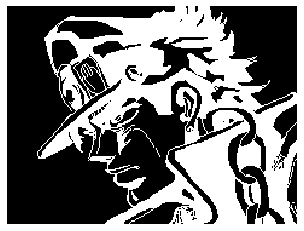

In [ ]:
###############################################
# Displaying noisy jojo making a separate case
# code block so you can display image separately
###############################################
if(choose_jojo):
  display_img(noisy_jojo_img)

You'll notice that our sanity checker is ideal. We need to make theory and reality meet. The images with added noise will be the received message. We need to make sure that the received messages are consistent with our data. The sanity checker below is a "better" version in terms of relating theory with reality. Observe the values and see if they are consistent. The differences should be small. (No pts. for this one since it's just additional info)



In [ ]:
###############################################
# Better checker and utilizing all other functions
###############################################
if(choose_batman):
  theo_batman_rcv_prob = theo_rcv_prob(batman_source_prob[0], epsilon)
  actual_batman_rcv_prob = bin_prob(noisy_batman_img)
  print("Batman: theoretical received probabilities [P(r=1),P(r=0)]")
  print(theo_batman_rcv_prob)
  print("Batman: actual received probabilities [P(r=1),P(r=0)]")
  print(actual_batman_rcv_prob)

if(choose_incredible):
  theo_incredible_rcv_prob = theo_rcv_prob(incredible_source_prob[0], epsilon)
  actual_incredible_rcv_prob = bin_prob(noisy_incredible_img)
  print("Incredible: theoretical received probabilities [P(r=1),P(r=0)]")
  print(theo_incredible_rcv_prob)
  print("Incredible: actual received probabilities [P(r=1),P(r=0)]")
  print(actual_incredible_rcv_prob)

if(choose_jojo):
  theo_jojo_rcv_prob = theo_rcv_prob(jojo_source_prob[0], epsilon)
  actual_jojo_rcv_prob = bin_prob(noisy_jojo_img)
  print("Jojo: theoretical received probabilities [P(r=1),P(r=0)]")
  print(theo_jojo_rcv_prob)
  print("Jojo: actual received probabilities [P(r=1),P(r=0)]")
  print(actual_jojo_rcv_prob)

Incredible: theoretical received probabilities [P(r=1),P(r=0)]
[0.5216851851851851, 0.47831481481481486]
Incredible: actual received probabilities [P(r=1),P(r=0)]
[0.5223611111111112, 0.4776388888888889]
Jojo: theoretical received probabilities [P(r=1),P(r=0)]
[0.4588240740740741, 0.5411759259259259]
Jojo: actual received probabilities [P(r=1),P(r=0)]
[0.4612731481481481, 0.5387268518518519]


While doing this, observe and try to ponder for yourself: "How can we qualify noise?" Yes. Qualify, so for example for a $\epsilon = 0.1$ how noisy is the image relative to our own human perspective? Take note of your thoughts.

# Task 3 - Calculating Information

This one is simple, create functions `get_hr(-)`, `get_hrgs(-)`, and `get_irs(-)`. The three functions:

* `get_hr(-)` returns the $H(R)$ value
* `get_hrgs(-)` returns the $H(R|S)$ value
* `get_irs(-)` returns the $I(R,S)$ value

There are a few guidelines:

* STRICTLY no using of global parameters. Eww don't do that...
* Functions only return 1 value. The designated one. Use type float.
* You are ALLOWED to add other functions if needed just make sure to document them.
* You are ALLOWED to use the given functions.
* You are ALLOWED to use the three target functions inside of each other if necessary.
* The arguments are up to you!

In [ ]:
###############################################
# Function to get H(R)
###############################################
def get_hr(data,e):
  p = data[0]
  q = p + e - (2*e*p)
  #print(p)
  #print(q)
  q2 = 1-q
  receiver_entropy = (-q*(math.log2(q)))-(q2*(math.log2(q2)))
  return receiver_entropy


In [ ]:
###############################################
# Function to get H(S)
###############################################
def get_hs(data,e):
  p = data[0]
  p2 = 1-p
  source_entropy = (-p*(math.log2(p)))-(p2*(math.log2(p2)))
  #print(receiver_entropy)
  return source_entropy

In [ ]:
###############################################
# Function to get H(R|S)
###############################################
def get_hrgs(e):
  if (e==1.0 or e==0):
    return 0
  else:
      e2 = 1-e
      noise_entropy = (-e*(math.log2(e)))-(e2*(math.log2(e2)))
  return noise_entropy

get_hrgs(0)

0

In [ ]:
###############################################
# Function to get H(R)
###############################################
def get_irs(receiver_entropy,noise_entropy):
  mutual_inf = receiver_entropy-noise_entropy
  return mutual_inf
  # Fill your code in here

get_irs(get_hr(actual_batman_rcv_prob,epsilon),get_hrgs(epsilon))

0.11843894346475792

In [ ]:
def get_hrs(e,data):
  receiver_entropy = get_hr(data,e)
  source_entropy = get_hs(data,e)
  noise_entropy = get_hrgs(e)
  mutual_information = get_irs(receiver_entropy,noise_entropy)

  joint_entropy = source_entropy + receiver_entropy - mutual_information


In [ ]:
###############################################
# For extracting data
###############################################

noisy_batman_img = add_noise(clean_batman_img,epsilon)
actual_batman_rcv_prob = bin_prob(noisy_batman_img)

#points arrays
joint_entropy_pts = []
receiver_entropy_pts=[]
mutual_information_pts = []
noise_entropy_pts = []
e_pts = []

for i in range(0, 11, 1):
    e = i / 10.0
    receiver_entropy = get_hr(actual_batman_rcv_prob,e)
    source_entropy = get_hs(actual_batman_rcv_prob,e)
    noise_entropy = get_hrgs(e)
    mutual_information = get_irs(receiver_entropy,noise_entropy)

    joint_entropy = source_entropy + receiver_entropy - mutual_information
    (joint_entropy_pts).append(joint_entropy)
    (receiver_entropy_pts).append(receiver_entropy)
    (mutual_information_pts).append(mutual_information)
    (noise_entropy_pts).append(noise_entropy)
    (e_pts).append(e)
    #print(e,round(receiver_entropy,4),round(noise_entropy,4),round(mutual_information,4))

###############################################

0.0 0.9972 0 0.9972
0.1 0.9982 0.469 0.5292
0.2 0.999 0.7219 0.2771
0.3 0.9996 0.8813 0.1183
0.4 0.9999 0.971 0.0289
0.5 1.0 1.0 0.0
0.6 0.9999 0.971 0.0289
0.7 0.9996 0.8813 0.1183
0.8 0.999 0.7219 0.2771
0.9 0.9982 0.469 0.5292
1.0 0.9972 0 0.9972


# CHECKPOINT (2.5 PTS. - TABLE; 2.5 PTS. - PLOTS)

Using the functions you've created do the following:

* Fill in the table below. Just answer one of the chosen images. 
* We provided an empty space above for you to use. You have the freedom to do whatever you need to do to get the appropriate data.
* Provide a plot showing the trends for $H(R)$, $H(R|S)$, and $I(R,S)$ while varying $\epsilon$. Superimpose the trends in a single plot.

Here are other guidelines:

* When extracting $H(R)$ please use the result AFTER the injecting the noise.
* Round to 4 decimal places.
* You are allowed to use other parts of the notebook. (e.g., the actual extraction of binary probabilities of the receiver)


# FILL IN THE TABLE

What picture did you use? Batman picture

$\epsilon$           | $H(R)$           | $H(R|S)$         | $I(R,S)$
---------------------|------------------|------------------|------------------
0.0                  | 0.9981           | 0                |0.9981
0.1                  | 0.9988           | 0.469            |0.5298
0.2                  | 0.9993           | 0.7219           |0.2774
0.3                  | 0.9997           | 0.8813           |0.1184
0.4                  | 0.9999           | 0.9710           |0.0290
0.5                  | 1.0              | 1.0              |0
0.6                  | 0.9999           | 0.971            |0.029
0.7                  | 0.9997           | 0.8813           |0.1184
0.8                  | 0.9993           | 0.7219           |0.2774
0.9                  | 0.9988           | 0.4690           |0.5298
1.0                  | 0.9981           | 0                |0.9981

# SHOW YOUR PLOT HERE

Text(0.5, 1.0, 'H(R),H(R|S) & I(R,S) with varying ϵ')

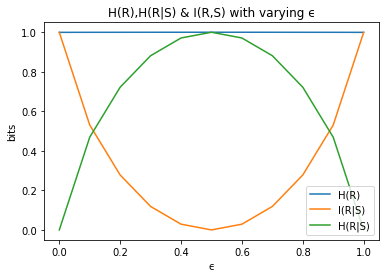

In [ ]:
###############################################
# Show your plots here
###############################################

plt.plot(e_pts,receiver_entropy_pts, label = 'H(R)')
plt.plot(e_pts,mutual_information_pts, label = 'I(R|S)')
plt.plot(e_pts,noise_entropy_pts, label = 'H(R|S)')
plt.legend(loc='lower right')

plt.xlabel('ϵ') 
plt.ylabel('bits') 
plt.title("H(R),H(R|S) & I(R,S) with varying ϵ")

###############################################

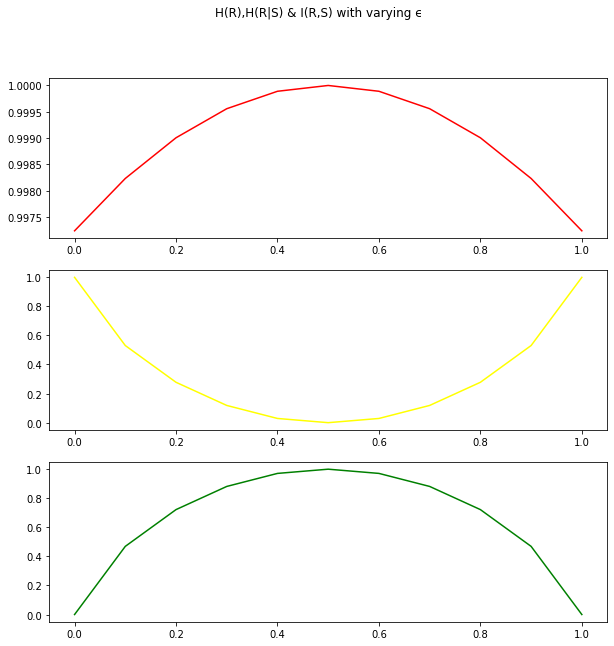

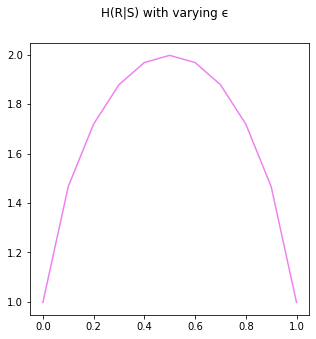

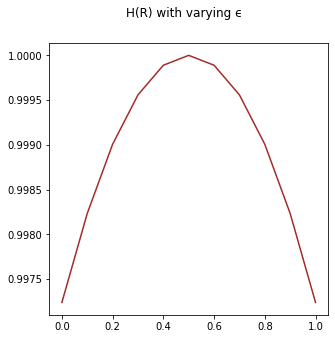

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(3)
fig.suptitle('H(R),H(R|S) & I(R,S) with varying ϵ')
ax1.plot(e_pts, receiver_entropy_pts, color = 'red')
ax2.plot(e_pts, mutual_information_pts,color = 'yellow')
ax3.plot(e_pts, noise_entropy_pts,color = 'green')


fig2, (bx1) = plt.subplots(1)
bx1.plot(e_pts,joint_entropy_pts, color = 'violet')
fig2.suptitle("H(R|S) with varying ϵ")

fig3, (bx2) = plt.subplots(1)
bx2.plot(e_pts,receiver_entropy_pts, color = 'brown')
fig3.suptitle("H(R) with varying ϵ")

fig.set_size_inches(10, 10)
fig2.set_size_inches(5, 5)
fig3.set_size_inches(5, 5)


# Task 4 - Answer the following

1. Based on your results, explain thoroughly how noise affects our images and our intuition about entropies and information? (2 pts.)



> As epsilon trends up to 0.5, the images looks less recognizable. At 0.5, the image is no longer recognizable. As the noise probability trends up from 0.5 to 1, the more pixels are inverted. At epsilon = 1, all the pixels are inverted.

> In addition, as the image becomes less recognizable, the receiver entropy H(R) increases but decreases when the pixels start to invert. This makes because the less we can make sense of the bits, means the more information we can get, hence, larger entropy. And although the bits are inverted as the noise probability trends up from 0.5 to 1, the image becomes more recognizable as a whole despite the bits being inverted. With less uncertainty of what the image is, the less entropy we got. 

> Observing I(R,S) as well, given the definition of mutual information, it makes sense that the noiser the images are, the less mutual information between the pixels of the original image and the noisy image. If a pixel of the original image is flipped at the receiving end (noisy image result),  that means that the received pixel does not tell us anything about the original pixel at all. Looking at the image as a whole, more noise means more bits flipped. At $\epsilon = 0.5$, its as if the noisy image is already a different image from the original, hence, 0 mutual information between the two. 

> Lastly, looking at the noise entropy, its at maximum at $\epsilon = 0.5$. That means we have maximum entropy at the received image (noisy image) despite knowing the original image. Which means we have maximum uncertainty about the noisy image despite knowing about the original image. However, when epsilon increases above 0.5 and starts to invert more bits, the noisy image starts to give less uncertainty and looking more like the original image.  

> In summary, adding more noise increase uncertainty about the received image (H(R) and H(R|S)) and less information about the original image and the received image (I(R,S)). However, at maximum noise probability ($\epsilon = 0.1$), it gives zero entropy and uncertainty because we can completely tell that the received image is just the inverted version of the original image. 

2. Based on your results and your perceived observations, is $\epsilon = 0.1$ very noisy already? (1 pts.)

> If very noise means the image is barely recognizable then no. The images can easily still be recognized at $\epsilon = 0.1$.

3. What did you learn from this programming exercise? (2 pts.)



> Noise affects the consistenty and/or similiarties between an original data and received data sent through a channel with added noise.

> Even if all the symbols of a data are inverted, it is possible to have a complete image of what the original data is. However, this only works for data that has symbols than can only take two values.

> Entropy is the measure of uncertainty. If noise increases entropy that means noise is a source of uncertainty. 

